In [1]:
# Import libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from PIL import Image

Using TensorFlow backend.


## data importing, transforming and scaling

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
# Importing training data
train_set = train_datagen.flow_from_directory('Cancer Project/data/train',target_size=(250,250),class_mode='binary')

Found 1707 images belonging to 2 classes.


In [4]:
train_set.class_indices

{'non_tumor': 0, 'tumor': 1}

In [5]:
# Importing testing data
test_set = test_datagen.flow_from_directory('Cancer Project/data/test',target_size=(250,250),class_mode='binary')

Found 100 images belonging to 2 classes.


In [29]:
# Initialising the CNN
classifier = Sequential()

# Adding Layers to the model
classifier.add(Conv2D(64,(3,3),input_shape = (250,250,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Flattening
classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [30]:
# Compiling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
classifier.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 248, 248, 64)      1792      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 59, 59, 64)        36928     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 29, 29, 64)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 53824)           

In [32]:
# fitting model to images
classifier.fit_generator(train_set,epochs=10,validation_data=test_set)

Epoch 1/10
54/54 [==============================] - 216s 4s/step - loss: 0.7286 - accuracy: 0.5753 - val_loss: 1.3776 - val_accuracy: 0.5000
Epoch 2/10
54/54 [==============================] - 217s 4s/step - loss: 0.5519 - accuracy: 0.7094 - val_loss: 0.6585 - val_accuracy: 0.5400
Epoch 3/10
54/54 [==============================] - 216s 4s/step - loss: 0.3890 - accuracy: 0.8108 - val_loss: 0.2918 - val_accuracy: 0.8600
Epoch 4/10
54/54 [==============================] - 219s 4s/step - loss: 0.2440 - accuracy: 0.8951 - val_loss: 0.1993 - val_accuracy: 0.9400
Epoch 5/10
54/54 [==============================] - 217s 4s/step - loss: 0.1769 - accuracy: 0.9203 - val_loss: 0.0193 - val_accuracy: 0.8400
Epoch 6/10
54/54 [==============================] - 218s 4s/step - loss: 0.1277 - accuracy: 0.9520 - val_loss: 0.9828 - val_accuracy: 0.7000
Epoch 7/10
54/54 [==============================] - 216s 4s/step - loss: 0.0918 - accuracy: 0.9607 - val_loss: 0.0259 - val_accuracy: 0.6800
Epoch 8/10
54

## Using this trained model - prediction of single new data

In [35]:
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('Cancer Project/data/single_prediction/IMG-1.jpg',target_size =(250,250))

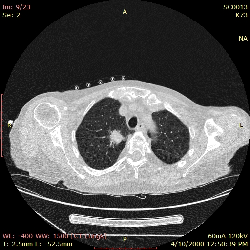

In [36]:
test_image

In [37]:
## Convert image to array
test_image = image.img_to_array(test_image)

## For single prediction change the dimension . 
test_image=test_image.reshape(1,250,250,3)

result = classifier.predict(test_image).round()

In [38]:
## Class label of tumor and non_tumor
if result == 1:
    prediction = 'tumor'
else:
    prediction = 'non_tumor'

In [39]:
prediction

'tumor'

In [40]:
# This was a successful prediction by this trained model